# Sentiment Analysis

# 1. Reading the DataSet

In [2]:
# reading the dataset
import pandas as pd

data=pd.read_csv("C:/Users/agnes/Downloads/fear_greed_index.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [3]:
print(data.describe())

          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000


In [4]:
print(data.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


# 2. Data Cleaning and Preprocessing

In [5]:
import pandas as pd
data['date']=pd.to_datetime(data['date'])
#converting object to standard integer datatime format

In [6]:
#check and remove duplicates
data.duplicated().sum()

0

In [7]:
#check empty values
data.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [8]:
#adding the specific values(day,month..)
data['weekdays']=data['date'].dt.day_name()
data['months']=data['date'].dt.month_name()
data['year']=data['date'].dt.year

In [9]:
#elements in classification
data['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [10]:
print(data.head())

    timestamp  value classification       date  weekdays    months  year
0  1517463000     30           Fear 2018-02-01  Thursday  February  2018
1  1517549400     15   Extreme Fear 2018-02-02    Friday  February  2018
2  1517635800     40           Fear 2018-02-03  Saturday  February  2018
3  1517722200     24   Extreme Fear 2018-02-04    Sunday  February  2018
4  1517808600     11   Extreme Fear 2018-02-05    Monday  February  2018


# 3.Analyse

In [11]:
class_count=data['classification'].value_counts()
print(class_count)

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


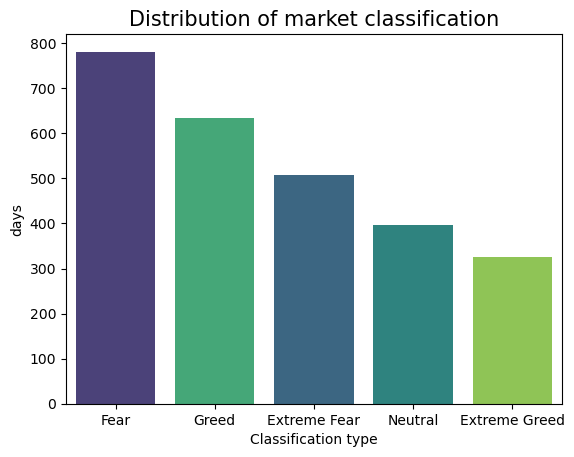

In [12]:
# visulation
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="classification",hue='classification',order=class_count.index,palette="viridis",legend=False,data=data)
plt.title("Distribution of market classification",fontsize=15)
plt.xlabel("Classification type")
plt.ylabel("days")
plt.show()

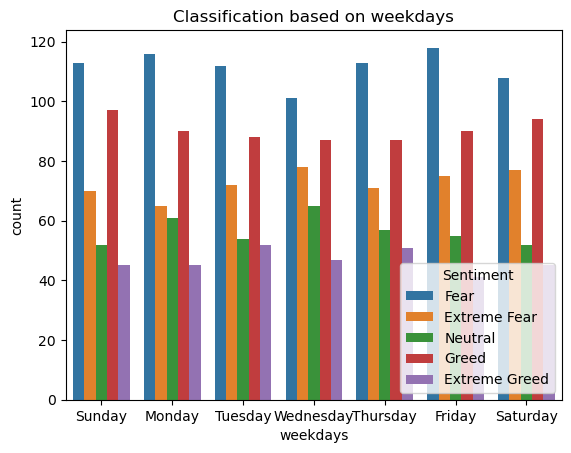

In [15]:
# analyse by week

sns.countplot(x="weekdays",hue="classification",order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],data=data)
plt.title("Classification based on weekdays")
plt.xlabel("weekdays")
plt.ylabel("count")
plt.legend(title="Sentiment",loc="lower right")
plt.show()

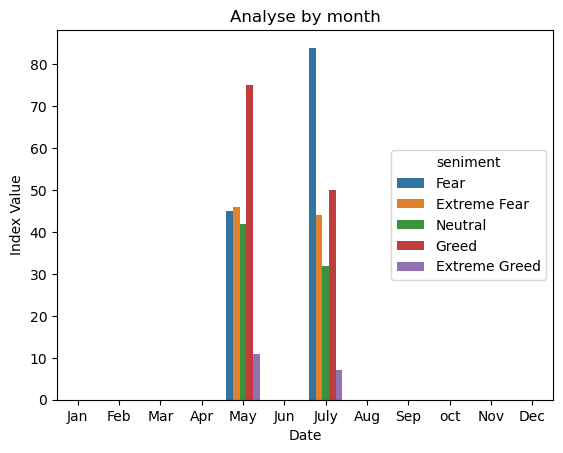

In [18]:
# analyse by month
sns.countplot(x="months",hue="classification",order=["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","oct","Nov","Dec"],data=data)
plt.title("Analyse by month")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend(title="seniment",loc="right")
plt.show()

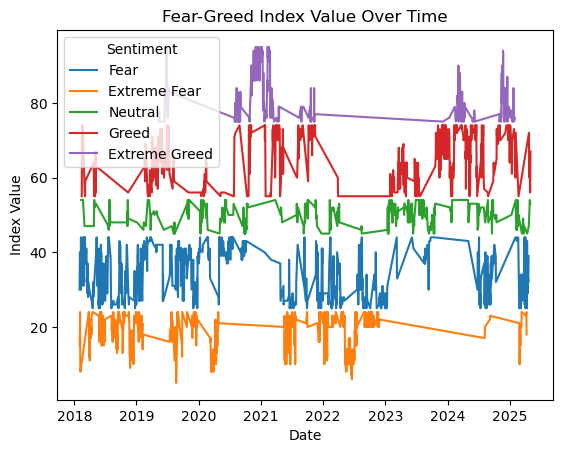

In [20]:
# Analysing the trend
sns.lineplot(data=data.sort_values('date'), x='date', y='value', hue='classification')
plt.title('Fear-Greed Index Value Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(title='Sentiment',  loc='upper left')
plt.show()